<a href="https://colab.research.google.com/github/mani6496/Amazon-Customer-Review/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df

In [ ]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,6.636503e-01,-0.189189,4.803550,117.968162,-0.002355,0.013001,0.020659,0.008180,-0.003039,-0.000398,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,3.290374e-01,0.916695,2.449449,50.840865,0.000085,0.014787,0.018604,0.004348,0.000325,0.000620,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,4.661401e+00,-1.162988,34.053028,823.492755,-0.014788,0.109111,0.167296,0.061055,-0.016396,-0.000355,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,7.149094e+01,-12.867168,517.009995,12808.517580,-0.176221,1.339725,2.205952,0.808460,-0.210896,-0.018519,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,1.175770e-03,0.000531,0.008420,0.157742,0.000014,0.000080,0.000105,0.000033,0.000023,0.000011,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127
mean compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,7.285822e-03,0.001346,0.058612,1.094708,0.000021,0.000699,0.000910,0.000209,0.000100,0.000071,0.136643,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656
mean concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,1.397016e-02,0.003352,0.106443,2.239119,0.000024,0.000957,0.001663,0.000336,0.000117,0.000095,0.265181,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741
mean concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,7.511381e-03,0.000460,0.055753,1.218501,0.000003,0.000341,0.000514,0.000147,0.000031,0.000026,0.155721,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258
mean symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,2.306389e-03,0.001937,0.017398,0.279314,0.000015,0.000207,0.000284,0.000067,0.000102,0.000024,0.024609,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217
mean fractal dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,2.173204e-07,0.000639,0.000569,-0.028961,0.000009,0.000071,0.000095,0.000015,0.000020,0.000013,-0.008657,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098


In [ ]:
eig_val,eig_vec = np.linalg.eig(df.cov())

In [ ]:
print("Eigen Values:",eig_val)

Eigen Values: [4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 7.01997261e-07 3.68048171e-06
 2.84790425e-06 2.00491564e-06]


In [ ]:
print("Eigen Vectors:",eig_vec)

Eigen Vectors: [[ 5.08623202e-03  9.28705650e-03 -1.23425821e-02 -3.42380473e-02
  -3.54561138e-02 -1.31213101e-01  3.35131912e-02  7.54924585e-02
  -3.50549264e-01 -1.39559852e-01 -4.19346972e-01  7.35141931e-01
   2.18087182e-01  8.10260113e-02  1.37865559e-01  1.41957144e-01
  -4.42129324e-02 -8.97292328e-02  2.10057742e-02 -8.01074429e-02
   5.94747776e-02 -8.72363409e-03  4.57847381e-03 -2.82894830e-02
  -3.59617411e-03 -1.60336173e-03 -6.48447162e-04 -2.79341068e-03
  -3.25869730e-03  5.12865810e-04]
 [ 2.19657026e-03 -2.88160658e-03 -6.35497857e-03 -3.62415111e-01
   4.43187450e-01 -2.13486089e-01 -7.84253475e-01  6.87405638e-02
   4.08376429e-03 -7.66679112e-02  2.90168453e-02 -1.77040388e-03
   4.23058843e-03  1.98471260e-03 -7.07543943e-03  3.71772553e-03
   1.74411881e-03  1.41458884e-04  1.24960485e-03  2.12853660e-04
  -5.08486619e-04  3.25522689e-04 -5.70803677e-04 -7.33059897e-05
  -4.32289948e-04 -6.85637302e-04 -4.67664637e-06 -2.03286434e-04
  -1.08812487e-04  1.28702

In [ ]:
eig_pair = [(np.abs(eig_val[i]),eig_vec[:,i]) for i in range (len(eig_val))]

In [ ]:
eig_pair

[(443782.6051465966,
  array([ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,  5.16826469e-01,
          4.23694535e-06,  4.05260047e-05,  8.19399539e-05,  4.77807775e-05,
          7.07804332e-06, -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
          2.23634150e-03,  5.57271669e-02, -8.05646029e-07,  5.51918197e-06,
          8.87094462e-06,  3.27915009e-06, -1.24101836e-06, -8.54530832e-08,
          7.15473257e-03,  3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
          6.42005481e-06,  1.01275937e-04,  1.68928625e-04,  7.36658178e-05,
          1.78986262e-05,  1.61356159e-06])),
 (7310.100061653242,
  array([ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,  8.51823720e-01,
         -1.48194356e-05, -2.68862249e-06,  7.51419574e-05,  4.63501038e-05,
         -2.52430431e-05, -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
          8.19640791e-04,  7.51112451e-03,  1.49438131e-06,  1.27357957e-05,
          2.86921009e-05,  9.36007477e-06,  1.22647432e-05,  2.89

In [ ]:
for i in eig_pair:
  print(i[0])

443782.6051465966
7310.100061653242
703.8337420062817
54.64873786522416
39.89001778728183
3.0045876787580843
1.8153302950112211
0.37146674035312616
0.15551354729343358
0.0840612196352232
0.03160895326928299
0.007497365136196896
0.0031616565214196706
0.0021615039509329235
0.0013265387885657489
0.0006402693041630491
0.00037488331994201793
0.0002351696261653629
0.00018458346723631837
0.0001641800642773727
7.811020111918574e-05
5.761116595607853e-05
3.491727745449509e-05
2.839526890350827e-05
1.6146367656677293e-05
1.2490241904942818e-05
7.01997261350051e-07
3.680481710646332e-06
2.847904251964196e-06
2.004915643544578e-06


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit_transform(scaler_data)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [ ]:
0.44272026 + 0.18971182

0.63243208

In [ ]:
pca.fit(scaler_data)
x_pca=pca.fit_transform(scaler_data)

In [ ]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
print("Shape of original data:",scaler_data.shape)

Shape of original data: (569, 30)


In [ ]:
print("Transformed shape:",x_pca.shape)

Transformed shape: (569, 2)


Text(0, 0.5, 'Second Principal Component')

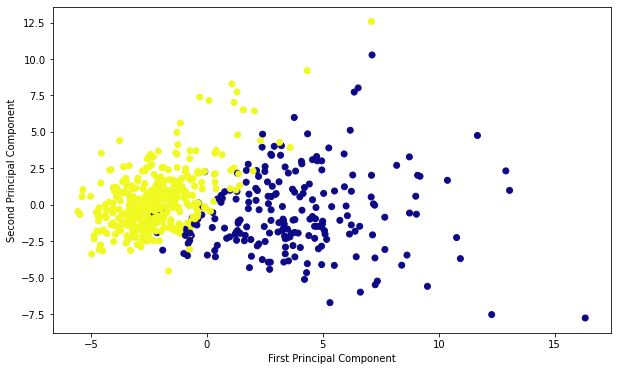

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
x_std=StandardScaler().fit_transform(df)
pca=PCA().fit(x_std)

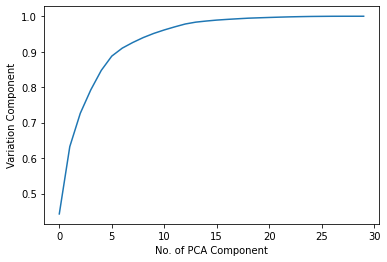

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of PCA Component")
plt.ylabel("Variation Component")
plt.show()

In [ ]:
y=pd.DataFrame(cancer['target'],columns=['target'])

In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,random_state=50)
rf_model = rf.fit(x_pca,y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
